In [3]:
from rac.experiment_data import ExperimentReader
er = ExperimentReader(metrics=["rand"])

acq_fns = ["freq", "entropy", "info_gain_object", "cluster_incon", "maxexp", "maxmin"]
start_index = 1
for af in acq_fns:
    config = {
        "_experiment_name": "test_experiment",
        "_num_repeats": 14,
        "_n_workers": 14,
        "_local": True,
        "_verbose": True,
        "_overwrite": False,
        "_mode": "ac",

        "seed": 14,
        "batch_size": [10],
        "noise_level": [0.4],
        "clustering_alg": "CC",
        "warm_start": [0, 0.05],
        "K_init": 10,
        "sim_init": 0.01,
        "sim_init_type": ["zeros", "kmeans"],

        "sample_size": 1,

        "acq_fn": af,
        "eps": 0.3,
        "beta": 1,
        "tau": [1, 7],
        "alpha": 0.5,
        "num_maxmin_edges": -1,
        "acq_noise": [True, False],
        "fix_neg": [False, True],
        "use_power": True,
        "power_beta": 1,
        "sparse_sim_matrix": True,
        "mean_field_beta": 3,
        "info_gain_lambda": 1,
        "num_edges_info_gain": [-1],
        "info_gain_pair_mode": ["uniform"],
        "mf_iterations": 50,

        "dataset_name": "synthetic",
        "dataset_n_samples": 70,
        "dataset_n_clusters": 10,
        "dataset_class_balance": None,
        "dataset_class_sep": [1.5],
        "dataset_n_features": [10],
        "dataset_y_flip": [0],
    }


    start_index = er.generate_experiments(
        folder="../configs/test_experiment",
        options_to_keep=[],
        start_index=start_index, 
        **config
    )

In [1]:
from rac.experiment_data import ExperimentReader
er = ExperimentReader(metrics=["rand", "num_repeat_queries", "num_violations"])
data = er.read_all_data(folder="../experiment_results_local/test_experiment/")

100


c:\github_projects\robust-active-clustering\rac\experiment_data.py:463: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


KeyboardInterrupt: 

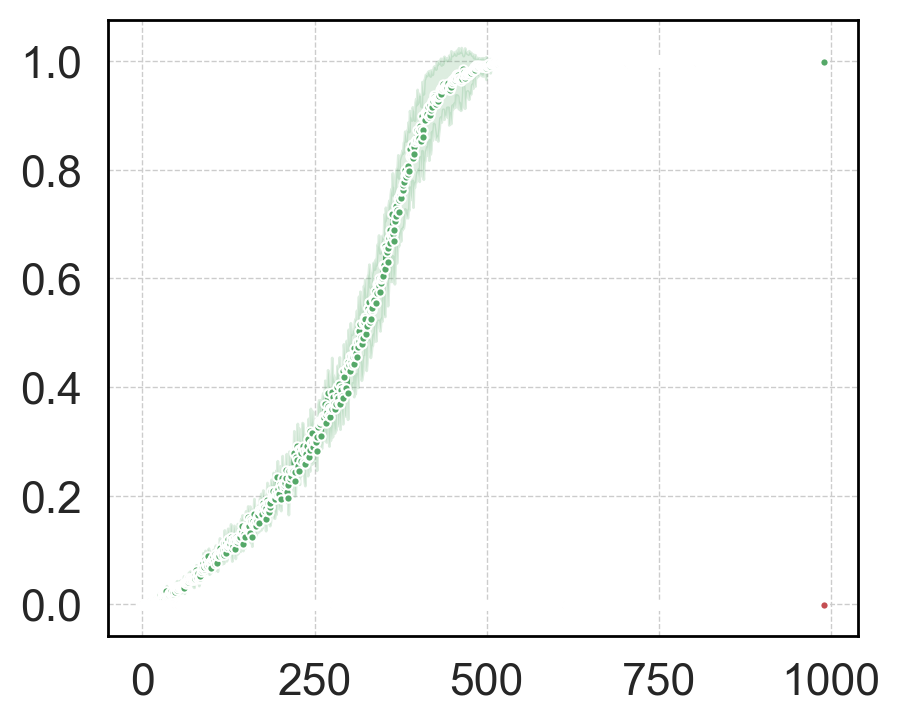

In [2]:
config = {
    "_experiment_name": "test_experiment",
    "_num_repeats": 14,
    "_n_workers": 14,
    "_local": True,
    "_verbose": True,
    "_overwrite": False,
    "_mode": "ac",

    "seed": 14,
    "batch_size": [5, 0.01],
    "noise_level": [0.4],
    "clustering_alg": "CC",
    "warm_start": [0, 0.02],
    "K_init": 10,
    "sim_init": 0.01,
    "sim_init_type": ["zeros", "kmeans"],

    "sample_size": 1,

    "acq_fn": ["freq", "entropy", "info_gain_object", "cluster_incon", "maxexp", "maxmin"],
    "eps": 0.3,
    "beta": 1,
    "tau": [1, 7],
    "alpha": 0.5,
    "num_maxmin_edges": -1,
    "acq_noise": [True, False],
    "use_power": True,
    "power_beta": 1,
    "sparse_sim_matrix": True,
    "mean_field_beta": 3,
    "info_gain_lambda": 1,
    "num_edges_info_gain": [-1, 50],
    "info_gain_pair_mode": ["uniform", "entropy"],
    "mf_iterations": 100,

    "dataset_name": "synthetic",
    "dataset_n_samples": 100,
    "dataset_n_clusters": 10,
    "dataset_class_balance": None,
    "dataset_class_sep": [1.5],
    "dataset_n_features": [10],
    "dataset_y_flip": [0],
}


er.generate_AL_curves(
    data,
    save_location="../plots/test_experiment/",
    categorize=["sim_init_type"],
    compare=["acq_fn"],
    vary=["x"],
    options_in_file_name=["noise_level", "batch_size", "warm_start", "tau", "acq_noise", "num_edges_info_gain", "info_gain_pair_mode"],
    auc=True,
    summary_method="auc_max_ind",
    indices=[], 
    threshold=1,
    err_style="band",
    marker="o",
    markersize=6,
    capsize=6,
    linestyle="solid",
    prop=False,
    **config
)

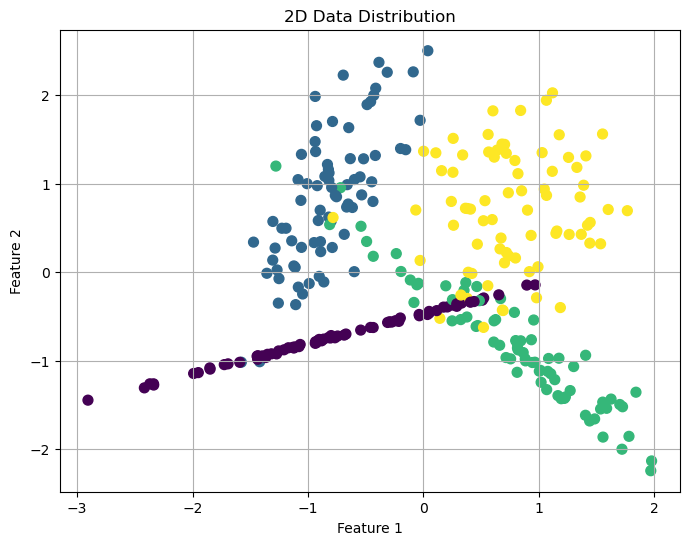

In [213]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
# Parameters for the dataset
n_samples = 200
n_features = 2
n_informative = 2
n_redundant = 0
n_repeated = 0
n_clusters = 4
class_sep = 5
kk = 15  # Example value for kk

# Generating the dataset
#X, y = make_blobs(n_samples=n_samples, centers=n_clusters, n_features=2, center_box=(-20,20), random_state=None)
# Parameters for the dataset

n_samples = 300
n_features = 2
n_informative = 2
n_redundant = 0
n_repeated = 0
n_clusters = 4
class_sep = 1
kk = 1  # Example value for kk

# Generating the dataset
X, y = make_classification(
    n_samples=n_samples,
    n_features=n_features,
    n_informative=n_informative,
    n_redundant=n_redundant,
    # n_repeated=n_repeated,
    n_classes=n_clusters,
    n_clusters_per_class=1,
    flip_y=0.0,  # No noise initially
    class_sep=class_sep,
    hypercube=True,
    shuffle=True,
    random_state=None)
X = StandardScaler().fit_transform(X)

# Plotting the dataset
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50)
plt.title('2D Data Distribution')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()

In [155]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit(X)
print(X)

StandardScaler()


In [190]:
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score

# Simulate a scenario
np.random.seed(42)  # For reproducibility

num_points = 100  # Number of data points
num_classes = 3   # Number of classes

# Generate random softmax probabilities
Y_softmax = np.random.rand(num_points, num_classes)
Y_softmax = Y_softmax / np.sum(Y_softmax, axis=1)[:, None]  # Normalize to make them proper probabilities

# Compute hard label predictions from softmax probabilities
Y_preds = np.argmax(Y_softmax, axis=1)

# Simulate the similarity matrix S based on softmax probabilities
S = np.dot(Y_softmax, Y_softmax.T)  # Dot product for simplicity in simulation

# Simulate CC.predict(S) by slightly perturbing Y_preds for simulation
perturbation = np.random.choice([-1, 0, 1], size=num_points, p=[0.1, 0.8, 0.1])  # Mostly unchanged, some perturbations
Y_CC = (Y_preds + perturbation) % num_classes  # Ensure it remains a valid class label

# Compare Y_CC and Y_preds
conf_matrix = confusion_matrix(Y_preds, Y_CC)
accuracy = accuracy_score(Y_preds, Y_CC)

conf_matrix, accuracy

(array([[23,  2,  3],
        [ 8, 30,  1],
        [ 6,  4, 23]], dtype=int64),
 0.76)